# Objective:

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering 
approaches

# About Book Crossing Dataset:

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. 
Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed
by 0

# Dataset:
    
http://www2.informatik.uni-freiburg.de/~cziegler/BX/

# 1. Load Libraries and Data

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']




b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [9]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [10]:
books.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [ ]:
books.head(10)

# 2. Check no.of records and features given in each dataset, clean the data

In [33]:
books.head(10)
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)
books.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [13]:
users.head(10)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [14]:
ratings.head(10)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


# 3. Check unique values of yearOfPublication

In [15]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

# 4. Check the rows having 'DK Publishing Inc' as yearOfPublication

In [34]:
books[books['yearOfPublication']=='DK Publishing Inc']
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


# 5. Change the datatype of yearOfPublication to 'int' and Drop NaNs in 'publisher' column

In [35]:
books.dtypes
books = books[(books.yearOfPublication != 'DK Publishing Inc') & (books.yearOfPublication != 'Gallimard')]
books.yearOfPublication = books.yearOfPublication.astype('int32')
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

In [36]:
books.isna().sum()
books.publisher.isnull().sum()
books = books.dropna(subset=['publisher'])
books.publisher.isnull().sum()
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

2

0

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            0
dtype: int64

In [37]:
books.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


# 6. Explore Users dataset

a. Get all unique values in ascending order for column Age

b. Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

c. Replace null values in column Age with mean

d. Change the datatype of Age to int

In [39]:
users.head(10)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [48]:
users.Age.unique()
sorted(users.Age.unique())


array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


In [50]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [58]:
users[(users['Age'] < 5) | (users['Age']>90)]=np.nan

users.Age.unique()
sorted(users.Age.unique())

array([nan, 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62.,
       63., 27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59.,
       48., 72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12.,
       74., 75., 76., 83., 68., 11., 77., 70.,  8.,  7., 81., 10.,  5.,
        6., 84., 82., 90., 85., 86., 87., 89., 88.])

[nan,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0]

In [60]:
users.Age.replace(np.nan,users.Age.mean(),inplace=True)

In [61]:
users.Age.unique()

array([34.72384042, 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 79.        , 22.        , 16.        ,
       65.        , 59.        , 48.        , 72.        , 56.        ,
       67.        , 80.        , 52.        , 69.        , 71.        ,
       73.        , 78.        ,  9.        , 64.        , 12.        ,
       74.        , 75.        , 76.        , 83.        , 68.  

In [63]:
users.Age = users.Age.astype(np.int32)
users.Age.unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88], dtype=int64)

# 7. Explore Ratings dataset

a. Check the shape

b. Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

c. Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

d. Consider only ratings from 1-10 and leave 0s in column bookRating

e. Find out which rating has been given highest number of times

In [68]:
ratings.shape
ratings.head(10)

(1149780, 3)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [72]:

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new.shape

(1031130, 3)

In [74]:
ratings_latest = ratings_new[ratings_new.userID.isin(users.userID)]
ratings_latest.shape

(1026151, 3)

In [75]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [77]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]
#checking shapes
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031130, 3)
(383839, 3)
(647291, 3)


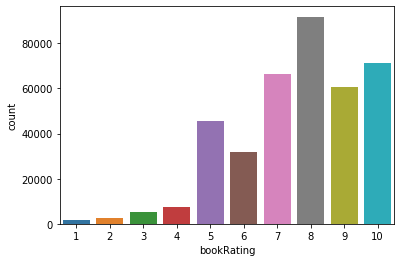

In [82]:
#ratings_explicit.groupby('bookRating').count()
#plotting count of bookRating
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()

In [89]:
ratings_explicit.bookRating.value_counts()

8     91804
10    71225
7     66401
9     60776
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

# 8. Collaborative Filtering Based Recommendation Systems

# a. For more accurate results only consider users who have rated atleast 100 books

# b. Generate matrix table from explicit ratings table

# c. Generate the predicted ratings using SVD with no.of singular values to be 50

In [92]:
counts1 = ratings_explicit['userID'].value_counts()
counts1
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
          ... 
148684       1
124088       1
105655       1
103606       1
211175       1
Name: userID, Length: 68091, dtype: int64

In [93]:
ratings_explicit.head()
ratings_explicit.shape

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


(103269, 3)

In [95]:
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [97]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)

In [99]:
preds_df.head()
preds_df.shape

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


(449, 66572)

# 9. Take a particular user_id

a. Lets find the recommendations for user with id 2110

b. Get the predicted ratings for userID 2110 and sort them in descending order

c. Create a dataframe with name user_data containing userID 2110 explicitly interacted books

d. Combine the user_data and and corresponding book data(book_data) in a single dataframe with name user_full_info

In [108]:
user_id=2
userID = ratings_matrix.iloc[1, :].name
userID
preds_df.head()

2110

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


In [128]:
preds_df.iloc[user_id]
sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)
len(sorted_user_predictions)
sorted_user_predictions

ISBN
0000913154   -0.015054
0001046438   -0.015457
000104687X   -0.010304
0001047213   -0.015457
0001047973   -0.015457
                ...   
B0000VZEJQ    0.006945
B0000X8HIE    0.003119
B00013AX9E   -0.000304
B0001I1KOG    0.009009
B000234N3A   -0.057692
Name: 2, Length: 66572, dtype: float64

66572

ISBN
0316666343    1.015397
059035342X    0.778665
0345350499    0.697309
0440214041    0.665439
044021145X    0.663549
                ...   
0380709562   -0.162346
0553213164   -0.173301
0440219078   -0.174497
0807508527   -0.204146
0743235150   -0.209452
Name: 2, Length: 66572, dtype: float64

In [114]:
# Get all user interacted books
user_data = ratings_explicit[ratings_explicit.userID == (userID)]
user_data

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5
...,...,...,...
14603,2110,1558504184,8
14605,2110,1561008931,7
14606,2110,1565111575,10
14608,2110,1570420564,10


In [115]:
book_data = books[books.ISBN.isin(user_data.ISBN)]

In [118]:
book_data.head()
book_data.shape
user_data.shape

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


(103, 5)

(103, 3)

In [120]:
user_full_info = user_data.merge(book_data)
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


In [121]:
print ('User {0} has already rated {1} movies.'.format(userID, user_full_info.shape[0]))

User 2110 has already rated 103 movies.


In [122]:
recommendations = (books[~books['ISBN'].isin(user_full_info['ISBN'])].
                   merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'ISBN'
                         ,right_on = 'ISBN')).rename(columns = {user_id: 'Predictions'})

In [123]:
recommendations.shape

(271252, 6)

In [124]:
recommendations.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.004590
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0.040935
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,NaN


# 10. Get top 10 recommendation for above given userID

In [127]:
recommendations.sort_values('Predictions', ascending = False).iloc[:10, :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
407,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",1.015397
2116,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey,0.697309
2438,0440214041,The Pelican Brief,John Grisham,1993,Dell,0.665439
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.663549
521,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,0.642840
20670,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey,0.639465
4810,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books,0.631446
6320,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks,0.629143
44448,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books,0.617955
8977,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic,0.614288


In [136]:
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[2, 1], [0, 2], [1, 2]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)


A = array([[2,0,1,1,2,2]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[2 1]
 [0 2]
 [1 2]]
[[-0.56158329  0.73938702 -0.37139068]
 [-0.50229537 -0.66132786 -0.55708601]
 [-0.65751317 -0.12630238  0.74278135]]
[3.38705417 1.5899258 ]
[[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]
[[2 0 1 1 2 2]]
[[-1.]]
[3.74165739]
[[-0.53452248  0.         -0.26726124 -0.26726124 -0.53452248 -0.53452248]
 [ 0.          1.          0.          0.          0.          0.        ]
 [-0.26726124  0.          0.95345225 -0.04654775 -0.0930955  -0.0930955 ]
 [-0.26726124  0.         -0.04654775  0.95345225 -0.0930955  -0.0930955 ]
 [-0.53452248  0.         -0.0930955  -0.0930955   0.81380899 -0.18619101]
 [-0.53452248  0.         -0.0930955  -0.0930955  -0.18619101  0.81380899]]


In [137]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine



A = np.array(
[[1, 7, 8, 4, 0, 4, 2, 0.3]])

B= np.array(
[[4, 8, 3, 9, 5, 0.4, 3, 1]])

dist_out = 1-pairwise_distances(A,B, metric="cosine")
dist_out

array([[0.72886706]])